In [1]:
#basic package
import json
import tqdm
import os
import numpy as np
import glob
import pandas as pd
import sys
import shutil
import time
import datetime as dt
import itertools
import time
import re
from collections import Counter
from collections import defaultdict
import operator
import math

#DTW
import dtaidistance
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis
from dtaidistance import clustering

#plot
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#change r to 0 from 0.2
sys.path.append('C:\\Users\\camil\\Desktop\\animals_code\\entropy')
from entropy.entropy import sample_entropy
#from entropy.entropy import sample_entropy #https://github.com/raphaelvallat/entropy

In [3]:
from UTILS import time_series_henColumn_tsRow, ZoneVariable, HenVariable, DistributionEntropy, \
heatmap_duration_perzone_perhen, TimeSeriesPlot, entropy_compare_session
import config_mobility as config

c:\users\camil\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
c:\users\camil\anaconda3\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


we restrict the time series to one value per 60 seconds 
we compute the complexity variables each 30 minutes 
each variables includes the values of at least the last 120.00 minutes (i.e. are using 120.00 values)


In [4]:
path_extracted_data = config.path_extracted_data
id_run = config.id_run
nbr_sec = config.nbr_sec

# Session Variables at Day Level computation

In [5]:
#day level
ts_name = 'time_serie_day'

### Nbr of bird per zone at each minute

#open time series per session and compute the variables for each session (car time series make sence at session level), et en 
#plus des variables tel que running entropy over the whole session ateach last timestamp of each level make sence only at 
#session level
START_TIME = time.clock()
li_path = glob.glob(os.path.join(path_extracted_data, id_run+'_TimeSeries_*.csv'))
li_path = [i for i in li_path if '_hen_' not in i]
for path_ in tqdm.tqdm(li_path):
    
    #download time series associated to this session
    name_ = path_.split('_')[-1].split('.')[0]
    print('-------------------------------------------------------------------------', name_)
    df_ts = pd.read_csv(path_, sep=';', parse_dates=['Timestamp', 'day']) 
    #df_ts = df_ts.sort_values('Timestamp', ascending=True)
    #print(df_ts.shape)
    #print(min(df_ts['Timestamp']), max(df_ts['Timestamp']))

    ZoneVariable(df_ts, config, save=True, red_dot_for_each_hen=True, nbr_bird_per_square_meter=False)
    
END_TIME = time.clock()
print ("Total running time: %.2f mn" %((END_TIME-START_TIME)/60))  

### Other variables

In [6]:
#open time series per session and compute the variables for each session (car time series make sence at session level), et en 
#plus des variables tel que running entropy over the whole session ateach last timestamp of each level make sence only at 
#session level
START_TIME = time.clock()
li_path = glob.glob(os.path.join(path_extracted_data, id_run+'_TimeSeries_*.csv'))
li_path = [i for i in li_path if '_hen_' not in i]
for path_ in tqdm.tqdm(li_path[16:]):
    
    #download time series associated to this session
    name_ = path_.split('_')[-1].split('.')[0]
    print('-------------------------------------------------------------------------', name_)
    df_ts = pd.read_csv(path_, sep=';', parse_dates=['Timestamp', 'day']) 
    
    #daily variable
    df_daily = HenVariable(df_ts, config, ts_name, name_=name_, compute_chi2_distance=False, save=True, time4entropy=False)

    # NOT VERIFIED
    #duration per zone per hen plot
    #heatmap_duration_perzone_perhen(df_daily, config)
    
END_TIME = time.clock()
print ("Total running time: %.2f mn" %((END_TIME-START_TIME)/60))  

  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

------------------------------------------------------------------------- 7A
your time series has 1 seconds between two timestamps
----------------- total duration per Zone....
The number of hours per "level" period is of:


Zone,verification_daily_total_nbr_hour,level,HenID
0,15.0,"[2017-04-14 00:00:00, 2017-04-15 00:00:00, 201...","[hen_1, hen_1, hen_1, hen_1, hen_1, hen_1, hen..."


----------------- first time stamp in each zone per day....
----------------- number of Zone (excluding nan)....
----------------- compute some variables based on a list of zones over a day....


C:\Users\camil\Desktop\animals_code\PhD\UTILS.py:3021: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  df_ = df[~df['Zone'].isnull()].groupby(['HenID','level'])['Zone'].agg(function2apply).reset_index()


Total running time: 22.18 mn


 17%|█████████████▎                                                                  | 1/6 [22:18<1:51:33, 1338.77s/it]

------------------------------------------------------------------------- 7B
your time series has 1 seconds between two timestamps
----------------- total duration per Zone....
The number of hours per "level" period is of:


Zone,verification_daily_total_nbr_hour,level,HenID
0,15.0,"[2017-04-22 00:00:00, 2017-04-23 00:00:00, 201...","[hen_100, hen_100, hen_100, hen_100, hen_100, ..."


----------------- first time stamp in each zone per day....
----------------- number of Zone (excluding nan)....
----------------- compute some variables based on a list of zones over a day....


C:\Users\camil\Desktop\animals_code\PhD\UTILS.py:3021: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  df_ = df[~df['Zone'].isnull()].groupby(['HenID','level'])['Zone'].agg(function2apply).reset_index()


Total running time: 21.32 mn


 33%|██████████████████████████▋                                                     | 2/6 [43:46<1:28:13, 1323.44s/it]

------------------------------------------------------------------------- 8A
your time series has 1 seconds between two timestamps
----------------- total duration per Zone....
The number of hours per "level" period is of:


Zone,verification_daily_total_nbr_hour,level,HenID
0,15.0,"[2017-05-04 00:00:00, 2017-05-05 00:00:00, 201...","[hen_1, hen_1, hen_1, hen_1, hen_1, hen_1, hen..."


----------------- first time stamp in each zone per day....
----------------- number of Zone (excluding nan)....
----------------- compute some variables based on a list of zones over a day....


C:\Users\camil\Desktop\animals_code\PhD\UTILS.py:3021: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  df_ = df[~df['Zone'].isnull()].groupby(['HenID','level'])['Zone'].agg(function2apply).reset_index()


Total running time: 19.73 mn


 50%|███████████████████████████████████████                                       | 3/6 [1:03:36<1:04:09, 1283.28s/it]

------------------------------------------------------------------------- 8B
your time series has 1 seconds between two timestamps
----------------- total duration per Zone....
The number of hours per "level" period is of:


Zone,verification_daily_total_nbr_hour,level,HenID
0,15.0,"[2017-05-12 00:00:00, 2017-05-13 00:00:00, 201...","[hen_100, hen_100, hen_100, hen_100, hen_100, ..."


----------------- first time stamp in each zone per day....
----------------- number of Zone (excluding nan)....
----------------- compute some variables based on a list of zones over a day....


C:\Users\camil\Desktop\animals_code\PhD\UTILS.py:3021: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  df_ = df[~df['Zone'].isnull()].groupby(['HenID','level'])['Zone'].agg(function2apply).reset_index()


Total running time: 19.24 mn


 67%|█████████████████████████████████████████████████████▎                          | 4/6 [1:22:56<41:33, 1246.54s/it]

------------------------------------------------------------------------- 9A


c:\users\camil\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


your time series has 1 seconds between two timestamps
----------------- total duration per Zone....
The number of hours per "level" period is of:


Zone,verification_daily_total_nbr_hour,level,HenID
0,15.0,"[2017-06-01 00:00:00, 2017-06-02 00:00:00, 201...","[hen_1, hen_1, hen_1, hen_1, hen_1, hen_1, hen..."


----------------- first time stamp in each zone per day....
----------------- number of Zone (excluding nan)....
----------------- compute some variables based on a list of zones over a day....


C:\Users\camil\Desktop\animals_code\PhD\UTILS.py:3021: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  df_ = df[~df['Zone'].isnull()].groupby(['HenID','level'])['Zone'].agg(function2apply).reset_index()


Total running time: 18.96 mn


 83%|██████████████████████████████████████████████████████████████████▋             | 5/6 [1:42:00<20:15, 1215.56s/it]

------------------------------------------------------------------------- 9B
your time series has 1 seconds between two timestamps
----------------- total duration per Zone....
The number of hours per "level" period is of:


Zone,verification_daily_total_nbr_hour,level,HenID
0,15.0,"[2017-06-09 00:00:00, 2017-06-10 00:00:00, 201...","[hen_101, hen_101, hen_101, hen_101, hen_101, ..."


----------------- first time stamp in each zone per day....
----------------- number of Zone (excluding nan)....
----------------- compute some variables based on a list of zones over a day....


C:\Users\camil\Desktop\animals_code\PhD\UTILS.py:3021: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  df_ = df[~df['Zone'].isnull()].groupby(['HenID','level'])['Zone'].agg(function2apply).reset_index()


Total running time: 17.29 mn


100%|████████████████████████████████████████████████████████████████████████████████| 6/6 [1:59:22<00:00, 1163.68s/it]


Total running time: 119.35 mn


In [7]:
print(df_daily.shape)
df_daily.head(3)

(300, 55)


,HenID,level,duration_zone_1,duration_zone_2,duration_zone_3,duration_zone_4,duration_zone_5,verification_daily_total_duration,dur_values,dur_values_normalized,...,chatoicmvt_Middlezone_1,chatoicmvt_Middlezone_2,chatoicmvt_Middlezone_3,chatoicmvt_Middlezone_4,chatoicmvt_Middlezone_5,chatoicmvt_Middlezone_1_nbr,chatoicmvt_Middlezone_2_nbr,chatoicmvt_Middlezone_3_nbr,chatoicmvt_Middlezone_4_nbr,chatoicmvt_Middlezone_5_nbr
0,hen_101,2017-06-09,0.0,0.0,0.0,2256.0,51744.0,54000.0,"[0.0, 0.0, 0.0, 2256.0, 51744.0]","[0.0, 0.0, 0.0, 0.041777777777777775, 0.958222...",...,0,0,0,[2256.0],0,0,0,0,1,0
1,hen_101,2017-06-10,0.0,0.0,0.0,2299.0,51701.0,54000.0,"[0.0, 0.0, 0.0, 2299.0, 51701.0]","[0.0, 0.0, 0.0, 0.04257407407407408, 0.9574259...",...,0,0,0,0,0,0,0,0,0,0
2,hen_101,2017-06-11,0.0,2868.0,480.0,15480.0,35172.0,54000.0,"[0.0, 2868.0, 480.0, 15480.0, 35172.0]","[0.0, 0.05311111111111111, 0.00888888888888888...",...,0,0,0,0,0,0,0,0,0,0


### visual on variables

#plot the histogram of duration per zone. useless
for i in range(df_daily.shape[0]):
    x = df_daily['li_event_chaoticmvt_z_d'].iloc[i]
    x = [i for i in x if i[0]!=None]
    #print(len(x))
    dico_z_lidur = {}
    for z,d in x:
        if z not in dico_z_lidur:
            dico_z_lidur[z] = []
        dico_z_lidur[z].append(d)
    #print(dico_z_lidur)
    plt.xticks(fontsize=10);    plt.yticks(fontsize=10)
    for z, li_dur in dico_z_lidur.items():
        plt.hist(li_dur,bins='auto') #auto
        plt.title('histogram of duration of zone z from mvt z-n,z,z+n '+str(z), size=13)
    plt.show()

dict_keys(['zone_4', 'zone_5', 'zone_3', 'zone_2', 'zone_1'])


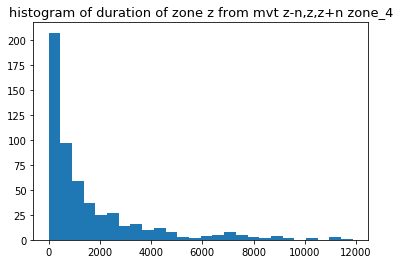

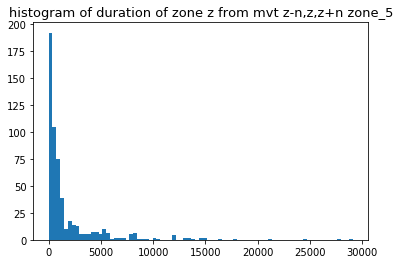

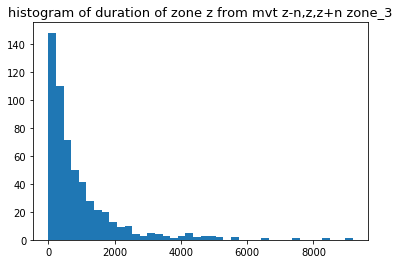

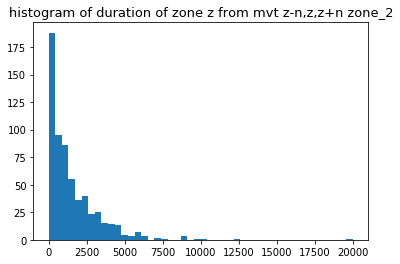

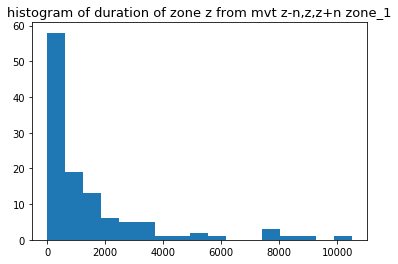

In [8]:
#plot the histogram of duration per zone. useless
li_x = []
for i in range(df_daily.shape[0]):
    x = df_daily['li_event_chaoticmvt_z_d'].iloc[i]
    li_x.extend([i for i in x if i[0]!=None])
    dico_z_lidur = {}
for z,d in li_x:
    if z not in dico_z_lidur:
        dico_z_lidur[z] = []
    dico_z_lidur[z].append(d)
print(dico_z_lidur.keys())
#print(dico_z_lidur)
for z, li_dur in dico_z_lidur.items():
    plt.xticks(fontsize=10);    plt.yticks(fontsize=10)
    plt.hist(li_dur,bins='auto')
    plt.title('histogram of duration of zone z from mvt z-n,z,z+n '+str(z), size=13)
    plt.show()

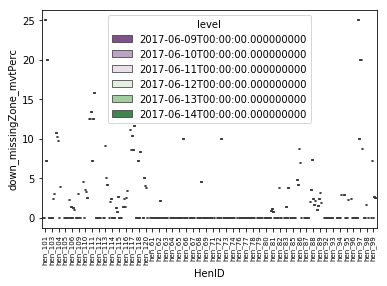

In [9]:
#boplot of percentage of skiping zone mvt, per hen. not good as almost only 0
plt.xticks(fontsize=7,rotation=90)
plt.yticks(fontsize=10)
#df_daily.groupby('HenID')['up_missingZone_mvtPerc'].agg(lambda x: list(x)).reset_index()
sns.boxplot(x='HenID', y='down_missingZone_mvtPerc', data=df_daily, hue='level', palette="PRGn");
#sns.boxplot(x='HenID', y='up_missingZone_mvtPerc', data=df_daily, hue='level', palette="PRGn");